In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pocomc as pc

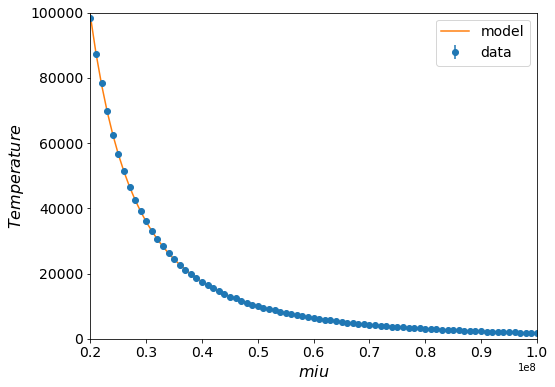

In [101]:
nu = np.arange(1,101,1) * np.power(10,6)
nu_0 = 50* np.power(10,6)
dt = 0.1
dnu = 1*np.power(10,6)
def model(paras, nu):
    A,alpha = paras
    return A*(nu/nu_0)**alpha
# True parameters
params_true = np.array([10000, -2.5])
# Creating Error
sigma = model(params_true, nu)/np.sqrt(dnu*dt)
#Simulating data
data = np.random.normal(model(params_true, nu), sigma) 
plt.figure(figsize=(8,6))
plt.errorbar(nu, data, yerr=error, fmt="o", label='data')
plt.plot(nu, model(params_true, nu), label='model')
plt.xlabel(r'$miu$', fontsize=16)
plt.ylabel(r'$Temperature$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlim(20e6, 100e6)
plt.ylim(0, 100000)
plt.show()

In [102]:
# Log-likelihood functions
def log_like(params, nu, data, error):
    m = model(params, nu)
    diff = m - data
    return -0.5 * np.sum((diff/sigma)**2)

# Log-prior probability density function
def log_prior(params, bounds):
    if np.any(params < bounds.T[0]) or np.any(params > bounds.T[1]):
        return -np.inf
    else:
        return 0.0

# Parameter bounds
bounds = np.array([[5000.0, 15000.0], # A
                   [-5.0, -1.0]]) # alpha

In [103]:
# Log-likelihood functions general
def log_like_gen(params, x, data, sigma):
    m = model(params, x)
    diff = m - data

In [104]:
n_particles = 100
n_dim = 2

prior_samples = np.random.uniform(low = bounds.T[0], high= bounds.T[1], size=(n_particles, n_dim))

In [105]:
# Sampler initialisation
sampler = pc.Sampler(n_particles,
                     n_dim,
                     log_likelihood=log_like,
                     log_prior=log_prior,
                     bounds=bounds,
                     log_likelihood_args=[nu, data, error],
                     log_prior_args=[bounds]
                    )

# Run sampler
sampler.run(prior_samples)

Iter: 65it [01:56,  1.79s/it, beta=1, calls=11700, ESS=0.997, logZ=-75, accept=0.184, N=2, scale=1.32, corr=0.705]        


In [106]:
# Add extra samples
sampler.add_samples(200000)
results = sampler.results

Iter: 2000it [00:25, 78.13it/s, beta=1, calls=tensor(367500), ESS=0.95, logZ=-75, accept=0.207, N=2, scale=1.33, corr=0.681]


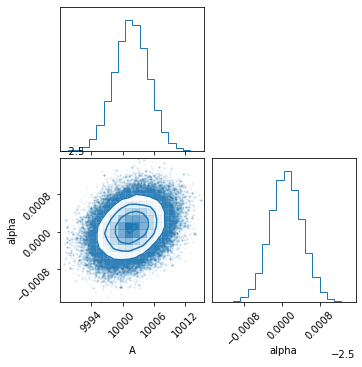

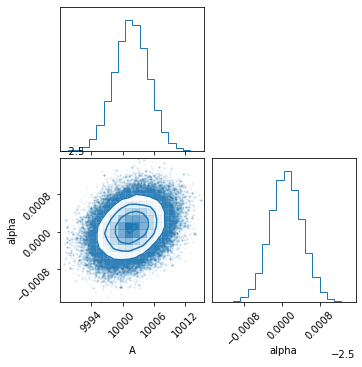

In [107]:
pc.plotting.corner(results, labels=['A', 'alpha'])

In [108]:
print('Mean values = ', np.mean(results['samples'], axis=0, dtype = "float64"))
print('Standard deviation values = ', np.std(results['samples'], axis=0,dtype = "float64"))

Mean values =  [ 1.00016962e+04 -2.49991157e+00]
Standard deviation values =  [3.30891932e+00 3.42669696e-04]


In [109]:
np.mean(results['samples'][:,0]),np.mean(results['samples'][:,1])

(10001.696, -2.4999115)

(100.0, -100.0)

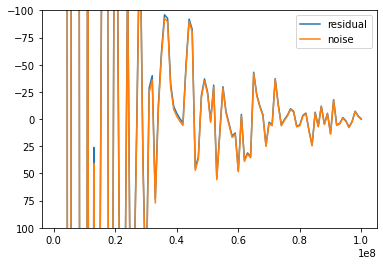

In [110]:
residual = data-model(np.array([np.mean(results['samples'][:,0]),np.mean(results['samples'][:,1])]),nu)
noise = data - model(params_true, nu)
plt.plot(nu,residual, label = "residual")
plt.plot(nu,noise, label = "noise")
plt.legend()
plt.ylim(100,-100)

In [111]:
results['samples']

array([[ 1.0004279e+04, -2.4995515e+00],
       [ 1.0004279e+04, -2.4995515e+00],
       [ 1.0001737e+04, -2.4999015e+00],
       ...,
       [ 1.0006259e+04, -2.4997163e+00],
       [ 1.0003393e+04, -2.4998469e+00],
       [ 1.0007813e+04, -2.4995923e+00]], dtype=float32)

In [112]:
testing = np.arange(6)
testing = np.reshape(testing, [3,2])
print(testing)
np.mean(testing, axis = 0)

[[0 1]
 [2 3]
 [4 5]]


array([2., 3.])

In [113]:
np.mean(results['samples'], axis =0)

array([ 9.9892891e+03, -2.4999962e+00], dtype=float32)

In [114]:
np.mean(results['samples'], axis =0, dtype = "float64")

array([ 1.00016962e+04, -2.49991157e+00])

In [115]:
np.mean(results['samples'][:,0]),np.mean(results['samples'][:,1])

(10001.696, -2.4999115)